C:\Users\Sayak23\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sayak23\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sayak23\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Sayak23\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Sayak23\anaco

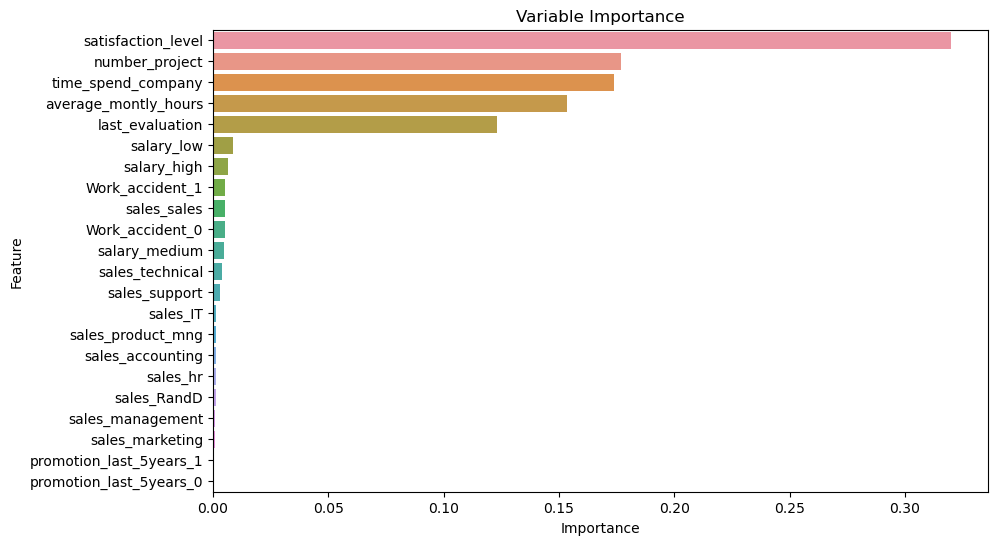

,Probability_score
0,0.980000
1,0.479833
2,0.502333
3,0.985000
4,1.000000
...,...
4495,0.070000
4496,1.000000
4497,0.090000
4498,0.065000


In [51]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Read the training and test data
hr_train = pd.read_csv("D:\\data ANALYTICS AND SCIENCE\\R EDVANCER\\PROJECT SUBMISSION DATA\\HR\\hr_train.csv")
hr_train 
hr_test = pd.read_csv("D:\\data ANALYTICS AND SCIENCE\\R EDVANCER\\PROJECT SUBMISSION DATA\\HR\\hr_test.csv")

# Separate the target variable
X_train = hr_train.drop('left', axis=1)
y_train = hr_train['left']

# Define preprocessing steps for numerical and categorical features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
categorical_features = ['Work_accident', 'promotion_last_5years', 'sales', 'salary']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the pipeline with preprocessing and random forest classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
test_pred_proba = pipeline.predict_proba(hr_test)[:, 1]

# Create a DataFrame for the probability scores
output = pd.DataFrame({'Probability_score': test_pred_proba})
output.to_csv("predicted_scores.csv", index=False)

# Perform grid search with cross-validation
param_grid = {
    'classifier__n_estimators': [100, 500],
    'classifier__max_features': [1, 5, 10, 25],  # Modify the range to a valid one
    'classifier__min_samples_leaf': [2, 10]
}


grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=10)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Get feature importance
importance = best_rf_model.named_steps['classifier'].feature_importances_
features = numerical_features + best_rf_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out().tolist()

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Variable Importance')
plt.show()

# Make predictions
train_pred = best_rf_model.predict_proba(X_train)[:, 1]
test_pred = best_rf_model.predict_proba(hr_test)[:, 1]
output = pd.DataFrame({'Probability_score': test_pred_proba})
output

In [38]:
#Find out total promotions happened in last 5 years
total_promotions = hr_train[hr_train['promotion_last_5years'] == 1].shape[0]
print(total_promotions)


228


In [39]:
# Find out the variance in statisfaction_level for category 0 of variable ‘left’ (round off to 4 decimal places).
left_0_data = hr_train[hr_train['left'] == 0]  # Filter for category 0 of 'left'
variance = left_0_data['satisfaction_level'].var()  # Calculate variance of 'satisfaction_level'
# Round off to 4 decimal places
variance = round(variance, 4)
print(variance)


0.0487


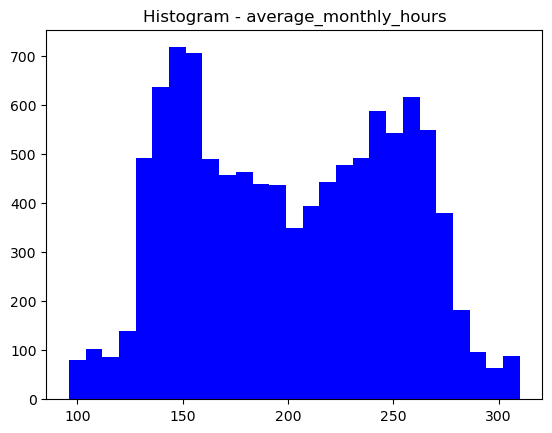

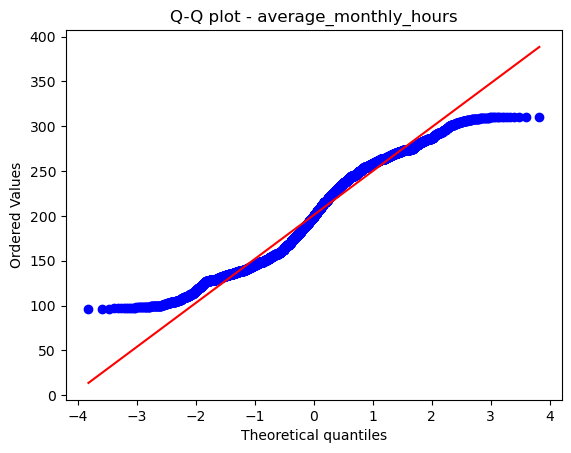

In [40]:
#Does average_monthly_hours follow normal distribution?
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming the dataset is named "hr_train"
average_monthly_hours = hr_train['average_montly_hours']

# Histogram
plt.hist(average_monthly_hours, bins='auto', color='blue')
plt.title('Histogram - average_monthly_hours')
plt.show()

# Q-Q plot
stats.probplot(average_monthly_hours, dist="norm", plot=plt)
plt.title('Q-Q plot - average_monthly_hours')
plt.show()


**The histogram and q-q plot visually tells average_monthly_hours does not follow normal distribution**

In [41]:
#Find out which category of salary has maximum employee resignation.
import pandas as pd

# Filter the dataset for resignations
resignations = hr_train[hr_train['left'] == 1]

# Calculate count of resignations by salary category
resignations_count = resignations['salary'].value_counts()

# Identify the category with maximum resignations
category_max_resignations = resignations_count.idxmax()

# Print the category with maximum resignations
print("The category of salary with maximum employee resignations is:", category_max_resignations)


The category of salary with maximum employee resignations is: low


In [42]:
# Find out correlation coefficient between last_evaluation and average_monthly_hours (round it off to 2 decimal places).
# Calculate correlation coefficient
correlation = hr_train['last_evaluation'].corr(hr_train['average_montly_hours'])

# Round off to 2 decimal places
correlation = round(correlation, 2)

# Print the correlation coefficient
print("Correlation coefficient:", correlation)


Correlation coefficient: 0.33


In [43]:
# According to given data what is the probability that someone will leave the organisation if they were involved in a work accident? (round off 2 decimal places)
# Calculate the probability
probability = sum(hr_train[hr_train['Work_accident'] == 1]['left'] == 1) / sum(hr_train['Work_accident'] == 1)

# Round off to 2 decimal places
probability = round(probability, 2)

# Print the probability
print("Probability of leaving if work accident:", probability)


Probability of leaving if work accident: 0.18


In [44]:
# Calculate the median time spent with the company among people leaving
median_time_leaving = np.median(hr_train.loc[hr_train['left'] == 1, 'time_spend_company'])

# Print the median time spent with the company
print("Median time spent with the company among people leaving:", median_time_leaving)


Median time spent with the company among people leaving: 3.0


In [49]:
# Calculate the median average monthly hours for each sales category
median_hours_by_sales = hr_train.groupby('sales')['average_montly_hours'].median().reset_index()

# Identify the sales category with the maximum median average monthly hours
max_median_sales = median_hours_by_sales.loc[median_hours_by_sales['average_montly_hours'].idxmax(), 'sales']

# Print the sales category with the maximum median average monthly hours
print("Sales category with maximum median average monthly hours:", max_median_sales)


Sales category with maximum median average monthly hours: accounting


In [50]:
# Does number of projects significantly differ between two categories of the target variable “left”?
from scipy.stats import ttest_ind

# Read the CSV file
hr_train = pd.read_csv("D:\\data ANALYTICS AND SCIENCE\\R EDVANCER\\PROJECT SUBMISSION DATA\\HR\\hr_train.csv")

# Separate the number of projects for each category of "left"
projects_left_0 = hr_train[hr_train['left'] == 0]['number_project']
projects_left_1 = hr_train[hr_train['left'] == 1]['number_project']

# Perform the independent two-sample t-test
result = ttest_ind(projects_left_0, projects_left_1)

# Print the p-value
print("p-value:", result.pvalue)


p-value: 0.010565377896942289


Since the p-value is less than the commonly used significance level of 0.05, we have evidence to reject the null hypothesis. This suggests that there is a statistically significant difference in the number of projects between employees who left the company (category 1 of "left") and those who didn't leave (category 0 of "left").

Yes, based on the given p-value of 0.0106, we can say that the number of projects significantly differs between the two categories of the target variable "left" in the given dataset.